# Accessing LAMBDA Data in the Cloud

### A brief tutorial on how to access the <a href="https://lambda.gsfc.nasa.gov">LAMBDA</a> data through the Amazon AWS <a href="https://registry.opendata.aws/">Open Data Registry</a>

In [1]:
import astropy
import boto3
import astropy.coordinates as coord
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline 

from botocore import UNSIGNED
from botocore.client import Config
s3_client = boto3.client("s3", config=Config(signature_version=UNSIGNED))

## Fetching and Displaying LAMBDA data

LAMBDA data can be found by browsing the <a href="https://lambda.gsfc.nasa.gov/product">LAMBDA data catalog</a>. Once a user has selected, for example, the WMAP DR5 smoothed polarization map for the K band, the portal shows the archive's URL of the dataset. To find the file on AWS is fairly straighforward. You just need to replace the "https://lambda.gsfc.nasa.gov/data" with "s3://nasa-lambda/". However, the WMAP data requires one additional step. It requires "map" to be replaced with "wmap" in the path.

In [2]:
url = "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/smoothed/wmap_band_smth_iqumap_r9_9yr_K_v5.fits"
##  The "map" directory on LAMBDA has been renamed "wmap" on AWS to clarify that it refers to the mission:
s3_uri = url.replace("https://lambda.gsfc.nasa.gov/data/map/","s3://nasa-lambda/wmap/")

With [astropy>=5.2](https://docs.astropy.org/en/stable/io/fits/#working-with-remote-and-cloud-hosted-files), you can read the file directly out of the bucket.  You must also install fsspec and s3fs.  (Astropy will tell you this.) With these libraries, you can open the FITS file and even extract subsets of the data. For this case, we will just visualize the map of one of the columns:

In [3]:
try:
    import fsspec, s3fs
except:
    print("Please install fsspec and s3fs in order to use the cell below.")
    
if tuple(map(int, (astropy.__version__.split(".")))) < tuple(map(int, ("5.2".split(".")))):
    print(f"You have astropoy v{astropy.__version__}. Please update astropy to >= 5.2")

In [4]:
hdul = fits.open(s3_uri, use_fsspec=True, fsspec_kwargs={"anon": True})

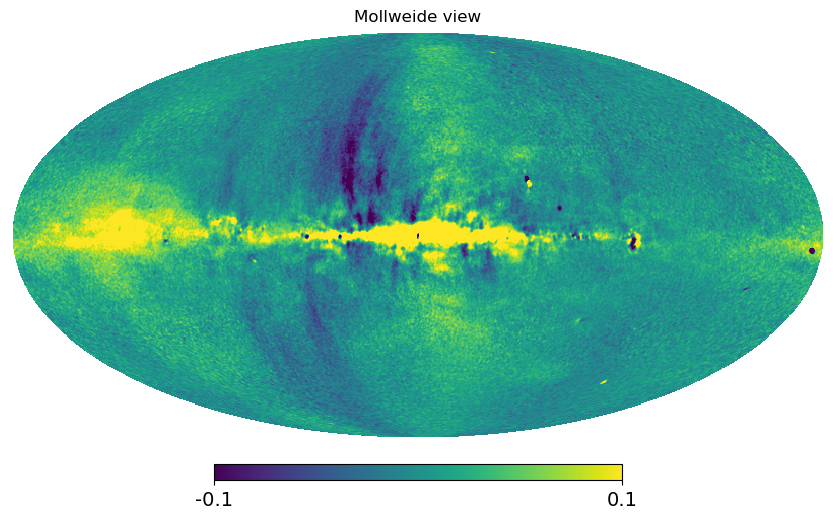

In [6]:
import healpy
healpy.mollview(hdul[1].data['Q_POLARISATION'],nest=True,min=-0.1,max=0.1)

You can also use the client to download the data. The following shows how to download the data to your computer.

In [7]:
##  To download the file, you can use
filename = "wmap_band_smth_iqumap_r9_9yr_K_v5.fits"
s3_client.download_file("nasa-lambda", 
                        f"wmap/dr5/skymaps/9yr/smoothed/{filename}", 
                        filename)
hdu_list = fits.open(filename)